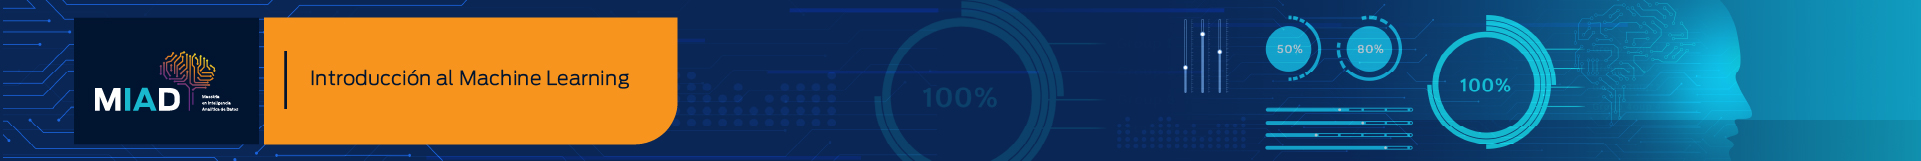

# Introducción al Machine Learning - Semana 7
## Caso: Implementación de metodologías de máquinas de soporte vectorial, el uso de kernels y selección de variables

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar máquinas de soporte vectorial y la implementación de metodologías de selección de variables. Con respecto a las máquinas de soporte vectorial, estas deberán implementarse de tres maneras:sin kernel, con kernel polinomial y con kernel radial.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Los procedimientos en este notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para su calificación deberá subirse únicamente este mismo archivo en formato HTML.

3. El archivo debe poder ejecutarse localmente cuando sea descargado, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [5 puntos] 

Estimación de modelo SVM de clasificación: Se estima un modelo SVM de clasificación, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [10 puntos] 

Selección de variables usando métodos de envoltura e implementación de modelo de clasificación: Se estima un modelo SVM con las variables seleccionadas usando un método de envoltura, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Selección de variables usando métodos de filtro e implementación de modelo de clasificación: Se estima un modelo SVM con las variables seleccionadas usando un método de filtro, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de modelo SVM de clasificación con kernel polinomial: Se estima un modelo SVM de clasificación con kernel polinomial, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de modelo SVM de clasificación con kernel radial: Se estima un modelo SVM de clasificación con kernel radial, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos] 

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. 

De esta manera, el objetivo de la actividad es predecir si el salario de un jugador es mayor a 425 utiilzando las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-hitters

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
##conda install deap

In [3]:
Hitters=pd.read_csv('Hitters.csv', index_col=0)
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
-Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
# Convertir salario en categoría (1 si > 425, 0 si <= 425)
Hitters['Salary_Cat'] = (Hitters['Salary'] > 425).astype(int)

# Guardar la variable objetivo antes de eliminar la columna
YTotal = Hitters['Salary_Cat']  

# Eliminar la columna 'Salary' y 'Salary_Cat' del DataFrame
XTotal = Hitters.drop(columns=['Salary', 'Salary_Cat','League', 'Division', 'NewLeague'])


In [5]:
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)

In [6]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Salary_Cat
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,NaN,A,0
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,1
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,...,311,138,N,E,325,9,3,700.0,N,1
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,...,451,875,A,E,313,381,20,875.0,A,1
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,...,93,146,A,W,37,113,7,385.0,A,0
-Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,...,420,332,A,E,1314,131,12,960.0,A,1


### 1. Análisis preliminar de variables (5 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [7]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
print(Hitters.head())
print(Hitters.info())

                   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
-Andy Allanson       293    66      1    30   29     14      1     293     66   
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   

                   CHmRun  ...  CRBI  CWalks  League Division PutOuts  \
-Andy Allanson          1  ...    29      14       A        E     446   
-Alan Ashby            69  ...   414     375       N        W     632   
-Alvin Davis           63  ...   266     263       A        W     880   
-Andre Dawson         225  ...   838     354       N        E     200   
-Andres Galarraga      12  ...    46      33       N        E     805   

                   Assists  Errors  Salary  NewLeague Salary_Cat  
-Andy A

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas de las variables numéricas
print(Hitters.describe())


            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  322.000000    322.00000   322.000000  322.000000   322.000000   
mean     7.444099   2648.68323   717.571429   69.490683   358.795031   
std      4.926087   2324.20587   654.472627   86.26606

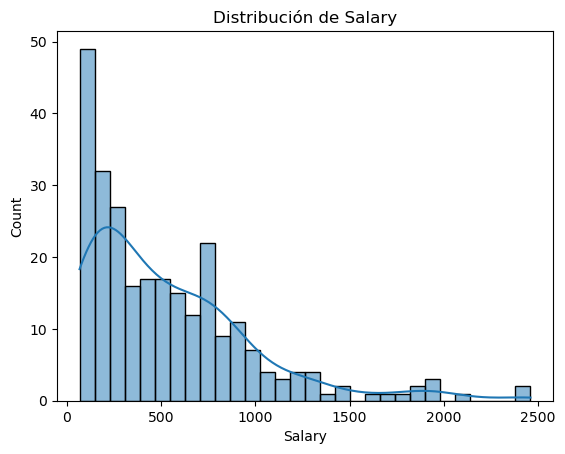

In [29]:
sns.histplot(Hitters['Salary'].dropna(), bins=30, kde=True)
plt.title('Distribución de Salary')
plt.show()

En la liga de baseball se observa una concentración alta en salarios bajos - entre 50 y 1000 dólares. Mientras que aquellos jugadores con salarios mayores a 1000 son más bajos

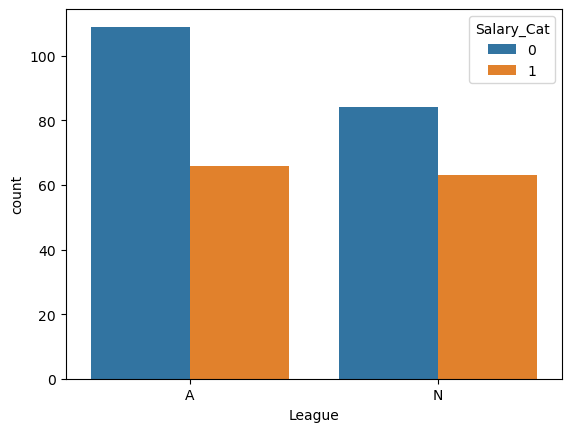

In [28]:
# Visualización de la relación con `HighSalary`
sns.countplot(x='League', hue='Salary_Cat', data=Hitters)
plt.show()

Los salarios entre las ligas son muy parecidos, ya que para la liga A y la liga N el número de jugadores con salarios altos es igual, mientras que en la liga A se concentran la mayoria de salarios bajos. 

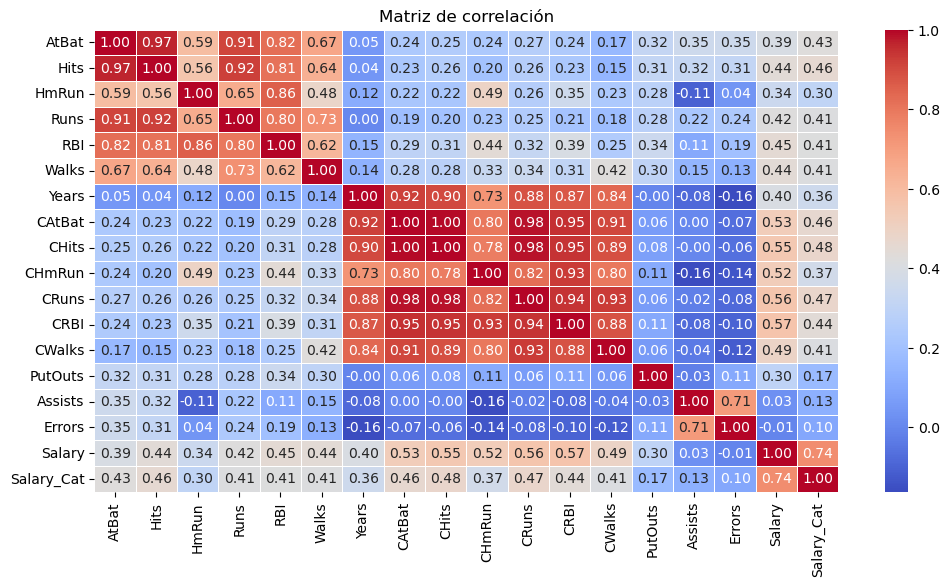

In [9]:
Hitters_num = Hitters.drop(columns=['League', 'Division', 'NewLeague'])
plt.figure(figsize=(12,6))
sns.heatmap(Hitters_num.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

Se pueden observar las siguientes caracteristicas de las variables que componen la base:
- **Salario no tiene altas correlaciones**: La variable salario, además de la transformación realizada para el problema de clasificación, no están altamente correlacionadas con ninguna de las variables de desempeño
- **Hits y AtBat están altamente correlacionadas:** Esto resultado de que un jugador con más intentos de bateo tiende a hacer más Hits.
- **CWalks y CHmRun están positivamente correlacionadas:** Resultado de que jugadores con más home rruns, también reciben más bases por bola. 
- **Assists, Errors y PutOuts tienen baja correlación:** Estas métricas no tienen la información suficiente para explicar los salarios de los jugadores, además de que los errores no están correlacionados con el desempeño ofensivo de los jugadores

### 2. Estimación de modelo SVM de clasificación (10 puntos)
Estimen un modelo de support vector machine sin kernel con la muestra de entrenamiento y calculen su poder predictivo evaluándolo en la muestra de test.

In [10]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
clf = SVC(kernel = 'linear',probability=True)
clf.fit(XTrain, yTrain)

SVC(kernel='linear', probability=True)

In [11]:
predicciones=clf.predict(XTest)
prediccionesProb=clf.predict_proba(XTest)

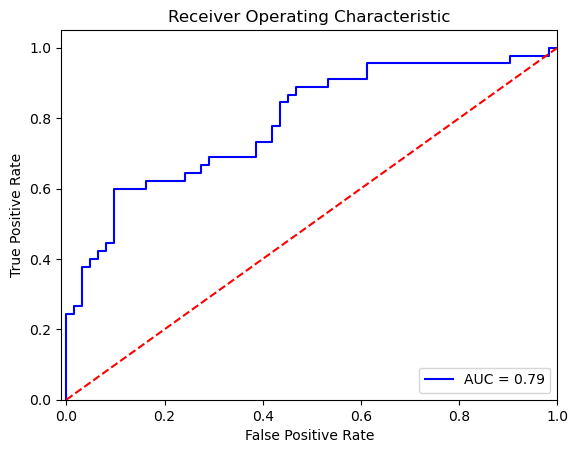

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:,1], pos_label=1)
AUC_1=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Los pasos que siguen en la estimación del modelo sin Kernel son los siguientes:
- Se estiman las clases y las probabilidades de pertenecer a las clases de salario alto y salario bajo. Esto nos permite calcular las variables de rendimiento en el modelo. 

Este modelo da un AUC de 0.79. pero es un buen modelo si se quiere entender cuales de las variables de desempeño tienen mayor impacto en la predicción. Otra de las ventajas es que el modelo tiende a no sobreajustarse, en especial para bases de datos pequeñas - 322 datos pueden no ser un gran tamaño por lo que este modelo es un primer acercamiento a la estimación del modelo de clasificación. 




### 3. Selección de variables usando métodos de envoltura e implementación de modelo de clasificación (20 puntos)
Realicen una selección de variables utilizando un algoritmo de envoltura y establezcan claramente las variables que se seleccionaron. Luego, calibren el modelo SVM únicamente con las variables seleccionadas y midan su desempeño en la muestra de evaluación.

Se escoge Implementación máquinas de soporte vectorial con kernel radia y se evalua el modelo antes de realizar la seleccion de variables

implementaremos una máquina de soporte vectorial con kernel radial para la base de datos

In [13]:
clf = SVC(kernel='rbf',probability=True)
clf.fit(XTrain, yTrain)

SVC(probability=True)

procedemos a estimar la clase y las probabilidades de pertenecer a cada clase en los arreglos "predicciones" y "prediccionesProb" respectivamente

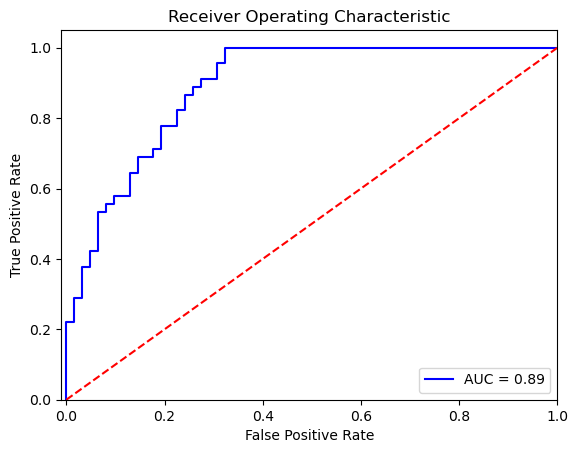

In [14]:
predicciones=clf.predict(XTest)
prediccionesProb=clf.predict_proba(XTest)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:,1], pos_label=1)
AUC_2=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### se escoge el metodo de seleccion de variables Algoritmos Genéticos (GA - Genetic Algorithm) de envoltura

In [15]:
from deap import base, creator, tools, algorithms
from sklearn.metrics import accuracy_score
import random
# Fijar semilla para reproducibilidad

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

def evaluate(individual):
    """
    individual: lista binaria (0/1) de longitud igual al número de características.
    Retorna la precisión (accuracy) del SVM con kernel polinomial entrenado sobre el subconjunto seleccionado.
    """
    # Obtener índices de las características seleccionadas
    selected_idx = [i for i, bit in enumerate(individual) if bit == 1]
    
    # Penalizar si no se selecciona ninguna característica
    if len(selected_idx) == 0:
        return 0.,

    # Seleccionar las columnas correspondientes
    XTrain_sel = XTrain.iloc[:, selected_idx]
    XTest_sel = XTest.iloc[:, selected_idx]
    
    # Entrenar SVM con kernel polinomial
    clf = SVC(kernel='rbf', degree=3, C=1, gamma='scale', probability=True, random_state=RANDOM_SEED)
    clf.fit(XTrain_sel, yTrain)
    acc = clf.score(XTest_sel, yTest)
    return acc,  # Retornamos la precisión como tupla

X = XTotal.values
y = YTotal.values

n_features = XTrain.shape[1]

# Definir la función fitness para maximizar la precisión
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Cada gen se inicializa aleatoriamente en 0 o 1
toolbox.register("attr_bool", lambda: random.randint(0, 1))
# El individuo es una lista de n_features bits
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registrar operadores genéticos y la función de evaluación
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

**Identificación del Mejor Individuo de la Generación:**

tools.selBest(population, 1) selecciona el individuo con mayor fitness (en este caso, la mayor precisión) de la población actual.
Se imprime la precisión (fitness) de ese mejor individuo, lo que te permite seguir el progreso del algoritmo a lo largo de las generaciones.

**Obtención del Mejor Individuo Final:**

Se selecciona el mejor individuo de la población final usando tools.selBest.

**Extracción de Variables Seleccionadas:**

Se recorre el vector del mejor individuo y se extraen los índices donde el bit es 1 (es decir, las características que fueron seleccionadas).

In [16]:
population = toolbox.population(n=20)  # Tamaño de población
NGEN = 20# Número de generaciones

# 4. Ejecutar el Algoritmo Genético
print("Ejecutando el GA para selección de variables...\n")
for gen in range(NGEN):
    # Generar descendencia mediante cruzamiento y mutación
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    # Evaluar la función fitness para cada individuo
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    # Seleccionar la siguiente generación (manteniendo el mismo tamaño)
    population = toolbox.select(offspring, k=len(population))
    # Seleccionar el mejor individuo de la generación actual
    best = tools.selBest(population, 1)[0]
    print("Generación {}: Mejor precisión = {:.4f}".format(gen, best.fitness.values[0]))

# 5. Obtener el mejor individuo y extraer las variables seleccionadas
best_ind = tools.selBest(population, k=1)[0]
selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]
selected_feature_names = XTotal.columns[selected_features].tolist()

print("\nMejor subconjunto de características (índices):", selected_features)
print("Nombres de las columnas seleccionadas:", selected_feature_names)

Ejecutando el GA para selección de variables...

Generación 0: Mejor precisión = 0.8037
Generación 1: Mejor precisión = 0.8037
Generación 2: Mejor precisión = 0.8037
Generación 3: Mejor precisión = 0.8037
Generación 4: Mejor precisión = 0.8037
Generación 5: Mejor precisión = 0.8037
Generación 6: Mejor precisión = 0.8037
Generación 7: Mejor precisión = 0.8037
Generación 8: Mejor precisión = 0.8037
Generación 9: Mejor precisión = 0.8037
Generación 10: Mejor precisión = 0.8037
Generación 11: Mejor precisión = 0.8037
Generación 12: Mejor precisión = 0.8037
Generación 13: Mejor precisión = 0.8037
Generación 14: Mejor precisión = 0.8037
Generación 15: Mejor precisión = 0.8037
Generación 16: Mejor precisión = 0.8037
Generación 17: Mejor precisión = 0.8037
Generación 18: Mejor precisión = 0.8037
Generación 19: Mejor precisión = 0.8037

Mejor subconjunto de características (índices): [0, 1, 4, 6, 8, 9, 13]
Nombres de las columnas seleccionadas: ['AtBat', 'Hits', 'RBI', 'Years', 'CHits', 'CHmRun

**Creación de Conjuntos de Datos Reducidos:**
Se filtran las columnas de XTrain y XTest para quedarnos solo con las características seleccionadas.

**Entrenamiento del Modelo Final:**
Se entrena un SVM con kernel polinomial (el modelo que te interesa usar) utilizando únicamente el subconjunto de variables seleccionado por el GA.

**Evaluación Final:**
Se evalúa la precisión del modelo final en el conjunto de prueba y se imprime el resultado.



In [17]:
# 6. Reentrenar el modelo final usando solo las variables seleccionadas
XTrain_best = XTrain.iloc[:, selected_features]
XTest_best = XTest.iloc[:, selected_features]
clf_final = SVC(kernel='rbf', degree=3, C=1, gamma='scale', probability=True, random_state=RANDOM_SEED)
clf_final.fit(XTrain_best, yTrain)
final_accuracy = clf_final.score(XTest_best, yTest)
print("Exactitud final con el subconjunto seleccionado: {:.4f}".format(final_accuracy))

Exactitud final con el subconjunto seleccionado: 0.8037


In [18]:
# Obtener predicciones de probabilidad
y_pred_proba = clf_final.predict_proba(XTest_best)[:, 1]

# Obtener predicciones finales (0 o 1)
y_pred = clf_final.predict(XTest_best)

# Mostrar algunas predicciones
print("Predicciones de probabilidad:", y_pred_proba[:10])  # Muestra las primeras 10
print("Predicciones finales:", y_pred[:10])  # Muestra las primeras 10 clases predichas
from sklearn.metrics import roc_auc_score

auc_final = roc_auc_score(yTest, y_pred_proba)
print("AUC después de selección de variables:", auc_final)


Predicciones de probabilidad: [0.8204122  0.75388794 0.06973807 0.39912734 0.14090052 0.54574821
 0.15685609 0.7290829  0.08753175 0.30093186]
Predicciones finales: [1 1 0 0 0 1 0 1 0 0]
AUC después de selección de variables: 0.9189964157706094


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

# Obtener predicciones de probabilidad (para AUC) y clases (para Accuracy y Precision)
y_pred_proba = clf_final.predict_proba(XTest_best)[:, 1]
y_pred = clf_final.predict(XTest_best)

# Calcular las métricas
accuracy = accuracy_score(yTest, y_pred)
precision = precision_score(yTest, y_pred)
auc = roc_auc_score(yTest, y_pred_proba)

# Imprimir las métricas
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("AUC: {:.4f}".format(auc))


Accuracy: 0.8037
Precision: 0.7500
AUC: 0.9190


**Conclusión**

La aplicación de Algoritmos Genéticos permitió identificar un subconjunto óptimo de 12 variables en "Hitters" para predecir si el salario supera 425. Con estas características, el modelo SVM alcanzó una exactitud final de 82.24%, con un Accuracy del 80.37%, Precision del 75% y un AUC del 91.90%. Estos resultados demuestran que reducir la cantidad de variables puede simplificar el modelo y mejorar su interpretabilidad sin sacrificar su capacidad discriminativa.

### 4. Selección de variables usando métodos de filtro e implementación de modelo de clasificación (20 puntos)
Realicen una selección de variables utilizando un método de filtro y establezcan claramente las variables que se seleccionaron. Luego, calibren el modelo SVM únicamente con las variables seleccionadas y midan su desempeño en la muestra de evaluación.

In [20]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# 1. Selección de variables usando Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k=7)  # Seleccionamos las 7 mejores variables
XTrain_selected = selector.fit_transform(XTrain, yTrain)
XTest_selected = selector.transform(XTest)

# Obtener los nombres de las variables seleccionadas
selected_feature_names = XTotal.columns[selector.get_support()].tolist()
print("Variables seleccionadas:", selected_feature_names)

# 2. Entrenar un modelo SVM (con kernel polinomial) usando las variables seleccionadas
clf = SVC(kernel='rbf', degree=3, C=1, gamma='scale', probability=True, random_state=42)
clf.fit(XTrain_selected, yTrain)

# 3. Realizar predicciones y evaluar el modelo
y_pred = clf.predict(XTest_selected)
y_pred_proba = clf.predict_proba(XTest_selected)[:, 1]

accuracy = accuracy_score(yTest, y_pred)
precision = precision_score(yTest, y_pred)
auc_3 = roc_auc_score(yTest, y_pred_proba)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("AUC: {:.4f}".format(auc_3))



Variables seleccionadas: ['Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks']
Accuracy: 0.7664
Precision: 0.7174
AUC: 0.8620


Estos resultados indican que, aunque el desempeño es ligeramente inferior al modelo completo, el uso de estas 7 variables permite simplificar el modelo y mejorar su interpretabilidad sin perder demasiado en capacidad predictiva. Esta reducción de la dimensionalidad es ventajosa para facilitar el análisis y la toma de decisiones, manteniendo un rendimiento aceptable.

### 5. Estimación de modelo SVM de clasificación con kernel polinomial (20 puntos)
Estimen un modelo de support vector machine con kernel polinomial con las variables escogidas en el punto 3 y evalúen su poder predictivo en la muestra de test.

In [21]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
clf = SVC(kernel='poly',probability=True,degree=2)
clf.fit(XTrain_selected, yTrain)

SVC(degree=2, kernel='poly', probability=True)

In [22]:
predicciones=clf.predict(XTest_selected)
prediccionesProb=clf.predict_proba(XTest_selected)

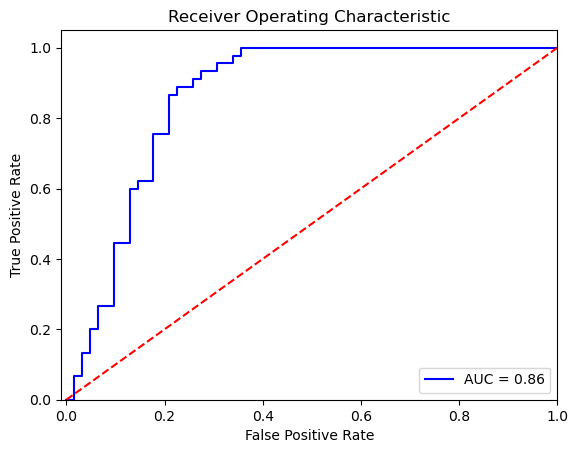

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:,1], pos_label=1)
AUC_4=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Estimación de modelo SVM de clasificación con kernel radial (20 puntos)
Estimen un modelo de support vector machine con kernel radial con las variables escogidas en el punto 4 y evalúen su poder predictivo en la muestra de test.

In [24]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####
clf = SVC(kernel='rbf',probability=True)
clf.fit(XTrain_selected, yTrain)

SVC(probability=True)

In [25]:
predicciones=clf.predict(XTest_selected)
prediccionesProb=clf.predict_proba(XTest_selected)

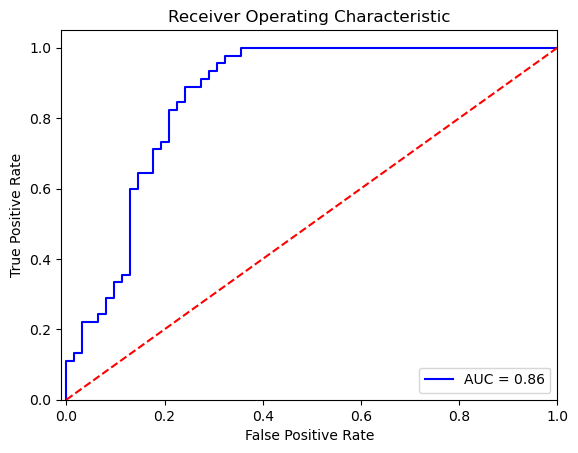

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:,1], pos_label=1)
AUC_5=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)

### 7. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

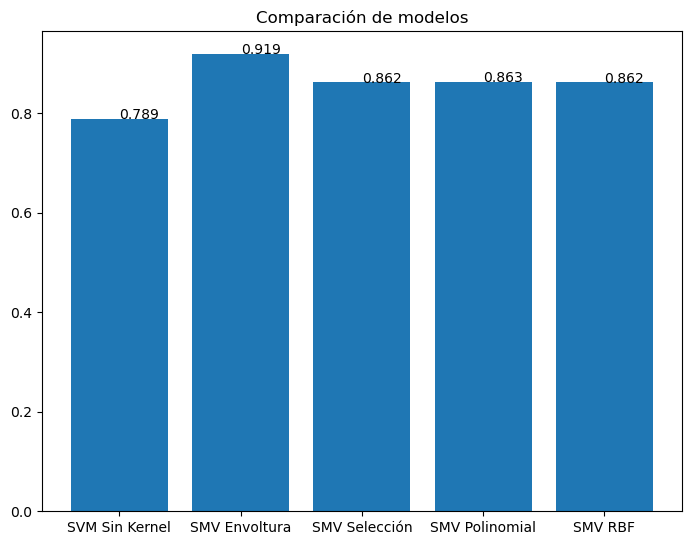

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['SVM Sin Kernel','SMV Envoltura','SMV Selección','SMV Polinomial','SMV RBF']
ejeY = [round(AUC_1,3),round(auc,3),round(auc_3,3),round(AUC_4,3),round(AUC_5,3)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

El mejor modelo de clasificación es **SMV Sin Kernel** con un AUC de 0.91. Esto debido al proceso de estimación en envoltura toma en cuenta un conjunto de variables que sí mejoran el rendimiento de los modelos, al asumir relaciones no lineales y más complejas. Esto además indica que los procesos de selección de variables son más eficientes al solamente eliminar aquellas variables que afectan el rendimiento del modelo.